In [1]:
#this notebook is for parameter recovery simulations of the gamma model 

import pandas as pd
import arviz as az
import numpy as np
import pandas as pd
import pytensor
import matplotlib.pyplot as plt 
import hssm
import ssms.basic_simulators
import pymc as pm

v_true_sim = 0 
a_true_sim = 1
z_true_sim = 0.5 
t_true_sim = 0.5 
shape_true = 5.0 
scale_true = 0.5 
c_true = 1.0 

test_dataset_sim = hssm.simulate_data(model='gamma_drift',
                                    theta=dict(v = v_true_sim, 
                                                a = a_true_sim,
                                                z = z_true_sim,
                                                t = t_true_sim, 
                                                shape = shape_true, 
                                                scale = scale_true, 
                                                c = c_true 

                                                ),
                                                size = 1000, 
                                                )
print(test_dataset_sim)

c:\Users\super\miniforge3\envs\hssm_bambi\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Boundary Dict: {'boundary_params': {}, 'boundary_fun': <function constant at 0x0000022B21AF3EC0>, 'boundary_multiplicative': True}
This is the sim param dict: {'max_t': 20, 's': 1.0, 'n_samples': 1000, 'n_trials': 1, 'delta_t': 0.001, 'random_state': None, 'return_option': 'full', 'smooth': True}
           rt  response
0    0.933676      -1.0
1    0.845895       1.0
2    1.813647      -1.0
3    1.005430      -1.0
4    1.254799       1.0
..        ...       ...
995  1.315537       1.0
996  2.323769       1.0
997  1.621126       1.0
998  0.775386      -1.0
999  1.869758       1.0

[1000 rows x 2 columns]


In [2]:
import onnx  



gamma_path = r"C:\Users\super\OneDrive\Desktop\Brown research stuff\saved model for gamma drift\gamma_drift_lan_eeccd94c421811ef8aeaa0423f3e9b72_torch_model.onnx"
model = onnx.load(gamma_path)
print(model)

ir_version: 8
producer_name: "pytorch"
producer_version: "2.3.1"
graph {
  node {
    input: "onnx::Gemm_0"
    input: "layers.0.weight"
    input: "layers.0.bias"
    output: "/layers.0/Gemm_output_0"
    name: "/layers.0/Gemm"
    op_type: "Gemm"
    attribute {
      name: "alpha"
      f: 1
      type: FLOAT
    }
    attribute {
      name: "beta"
      f: 1
      type: FLOAT
    }
    attribute {
      name: "transB"
      i: 1
      type: INT
    }
  }
  node {
    input: "/layers.0/Gemm_output_0"
    output: "/layers.1/Tanh_output_0"
    name: "/layers.1/Tanh"
    op_type: "Tanh"
  }
  node {
    input: "/layers.1/Tanh_output_0"
    input: "layers.2.weight"
    input: "layers.2.bias"
    output: "/layers.2/Gemm_output_0"
    name: "/layers.2/Gemm"
    op_type: "Gemm"
    attribute {
      name: "alpha"
      f: 1
      type: FLOAT
    }
    attribute {
      name: "beta"
      f: 1
      type: FLOAT
    }
    attribute {
      name: "transB"
      i: 1
      type: INT
    }
  }

In [2]:

gamma_path = r"C:\Users\super\OneDrive\Desktop\Brown research stuff\saved model for gamma drift\gamma_drift_lan_eeccd94c421811ef8aeaa0423f3e9b72_torch_model.onnx"


gamma_model = hssm.HSSM(model='gamma_drift',
                        model_config = {
                                  "list_params": ["v", "a", "z", "t", "shape", "scale", "c"],
                                  "bounds": { 
                                      "v": (-3.0, 3.0), 
                                      "a": (0.3, 3.0), 
                                      "z": (0.1, 0.9),
                                      "t": (0.001, 2),
                                      "shape": (2.0, 10), 
                                      "scale": (0.01, 1.0), 
                                      "c": (-3.0, 3.0)
                                      
                                    
                                  }, 
                                  "backend": "jax",   

                              }, 
                           
                        data = test_dataset_sim,
                        loglik = gamma_path, 
                        loglik_kind = "approx_differentiable", 
                        p_outlier = 0)

You have specified the `lapse` argument to include a lapse distribution, but `p_outlier` is set to either 0 or None. Your lapse distribution will be ignored.
processing v
link None
processing a
link None
processing z
link None
processing t
link None
processing shape
link None
processing scale
link None
processing c
link None
{'z_interval__': array(0.), 'shape_interval__': array(0.), 'c_interval__': array(0.), 't_interval__': array(-1.11022302e-16), 'a_interval__': array(-1.66533454e-16), 'scale_interval__': array(0.), 'v': array(0.)}


In [3]:
infer_data_simple_ddm_model = gamma_model.sample(
    sampler="nuts_numpyro",  # type of sampler to choose, 'nuts_numpyro', 'nuts_blackjax' of default pymc nuts sampler
    cores=1,  # how many cores to use
    chains=4,  # how many chains to run
    draws=1000,  # number of draws from the markov chain
    tune=1500,  # number of burn-in samples
)

Compiling.. :   0%|          | 0/2500 [00:00<?, ?it/s]






Running chain 0:   0%|          | 0/2500 [00:03<?, ?it/s]

Running chain 0:   5%|▌         | 125/2500 [00:37<10:36,  3.73it/s]


Running chain 0:  10%|█         | 250/2500 [00:54<07:14,  5.18it/s]

Running chain 0:  15%|█▌        | 375/2500 [01:10<05:48,  6.10it/s]


Running chain 0:  20%|██        | 500/2500 [01:34<05:48,  5.74it/s]


Running chain 0:  25%|██▌       | 625/2500 [01:54<05:15,  5.94it/s]


Running chain 0:  30%|███       | 750/2500 [02:10<04:31,  6.44it/s]


Running chain 0:  35%|███▌      | 875/2500 [02:27<04:02,  6.70it/s]


Running chain 0:  40%|████      | 1000/2500 [02:43<03:33,  7.04it/s]


Running chain 0:  45%|████▌     | 1125/2500 [03:01<03:14,  7.06it/s]


Running chain 0:  50%|█████     | 1250/2500 [03:16<02:49,  7.37it/s]


Running chain 0:  55%|█████▌    | 1375/2500 [03:32<02:29,  7.53it/s]



Running chain 0:  60%|██████    | 1500/2500 [03:50<02:18,  7.24it/s]


Running chain 0:  65%|██████▌   | 1

Boundary Dict: {'boundary_params': {}, 'boundary_fun': <function constant at 0x0000022B21AF3EC0>, 'boundary_multiplicative': True}
This is the sim param dict: {'max_t': 20, 's': 1.0, 'n_samples': 1000, 'n_trials': 1, 'delta_t': 0.001, 'random_state': None, 'return_option': 'full', 'smooth': True}


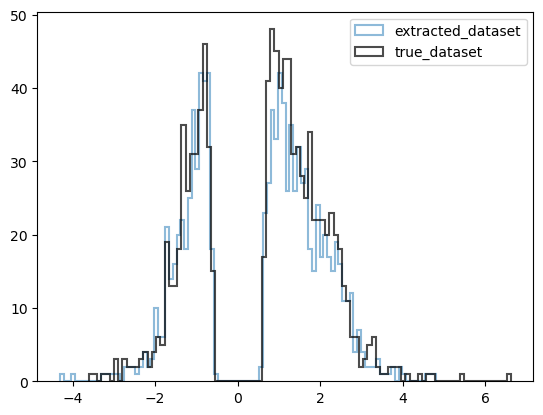

In [4]:
df = az.summary(infer_data_simple_ddm_model)
compare_data_set = hssm.simulate_data(model='gamma_drift',
                            theta=dict( v = df.loc['v', 'mean'],
                                        a = df.loc["a", 'mean'],
                                        z = df.loc['z', 'mean'],
                                        t = df.loc["t", 'mean'],
                                        shape = df.loc['shape', 'mean'],
                                        # p_target = 0.5,
                                        scale = df.loc['scale', 'mean'],
                                        c = df.loc['c', 'mean']
                                       
                                       
                                        
                                        ),
                                        size = 1000)

plt.hist(compare_data_set['rt'] * compare_data_set['response'], bins=100, histtype = "step", alpha=0.5, label="extracted_dataset", linewidth=1.5) 
plt.hist(test_dataset_sim['rt'] * test_dataset_sim['response'], bins=100, histtype = "step", alpha=0.7, label="true_dataset", color='black', linewidth=1.5)
plt.legend()

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
a            0.949  0.030   0.899    1.010      0.009    0.007      13.0   
c            1.542  0.671   0.962    3.000      0.288    0.220      11.0   
scale        0.864  0.080   0.720    0.997      0.011    0.008      46.0   
shape        3.307  0.691   2.000    4.171      0.268    0.199      11.0   
t            0.528  0.013   0.502    0.550      0.003    0.002      19.0   
...            ...    ...     ...      ...        ...      ...       ...   
v_mean[496] -0.533  0.712  -2.126    0.021      0.312    0.237      11.0   
v_mean[497] -0.533  0.712  -2.126    0.021      0.312    0.237      11.0   
v_mean[498] -0.533  0.712  -2.126    0.021      0.312    0.237      11.0   
v_mean[499] -0.533  0.712  -2.126    0.021      0.312    0.237      11.0   
z            0.535  0.048   0.476    0.644      0.020    0.015      11.0   

             ess_tail  r_hat  
a                25.0   1.23  
c                29.0   1

TypeError: 'v' is an invalid keyword argument for print()

c:\Users\super\miniforge3\envs\hssm_bambi\Lib\site-packages\arviz\plots\plot_utils.py:272: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (1007) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'c'}>,
        <Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'shape'}>],
       [<Axes: title={'center': 't'}>, <Axes: title={'center': 'v'}>,
        <Axes: title={'center': 'v_mean\n0'}>,
        <Axes: title={'center': 'v_mean\n1'}>],
       [<Axes: title={'center': 'v_mean\n2'}>,
        <Axes: title={'center': 'v_mean\n3'}>,
        <Axes: title={'center': 'v_mean\n4'}>,
        <Axes: title={'center': 'v_mean\n5'}>],
       [<Axes: title={'center': 'v_mean\n6'}>,
        <Axes: title={'center': 'v_mean\n7'}>,
        <Axes: title={'center': 'v_mean\n8'}>,
        <Axes: title={'center': 'v_mean\n9'}>],
       [<Axes: title={'center': 'v_mean\n10'}>,
        <Axes: title={'center': 'v_mean\n11'}>,
        <Axes: title={'center': 'v_mean\n12'}>,
        <Axes: title={'center': 'v_mean\n13'}>],
       [<Axes: title={'center': 'v_mean\n14'}>,
        <Axes: title={'center': 'v_mean\n15'}>,
        <Ax

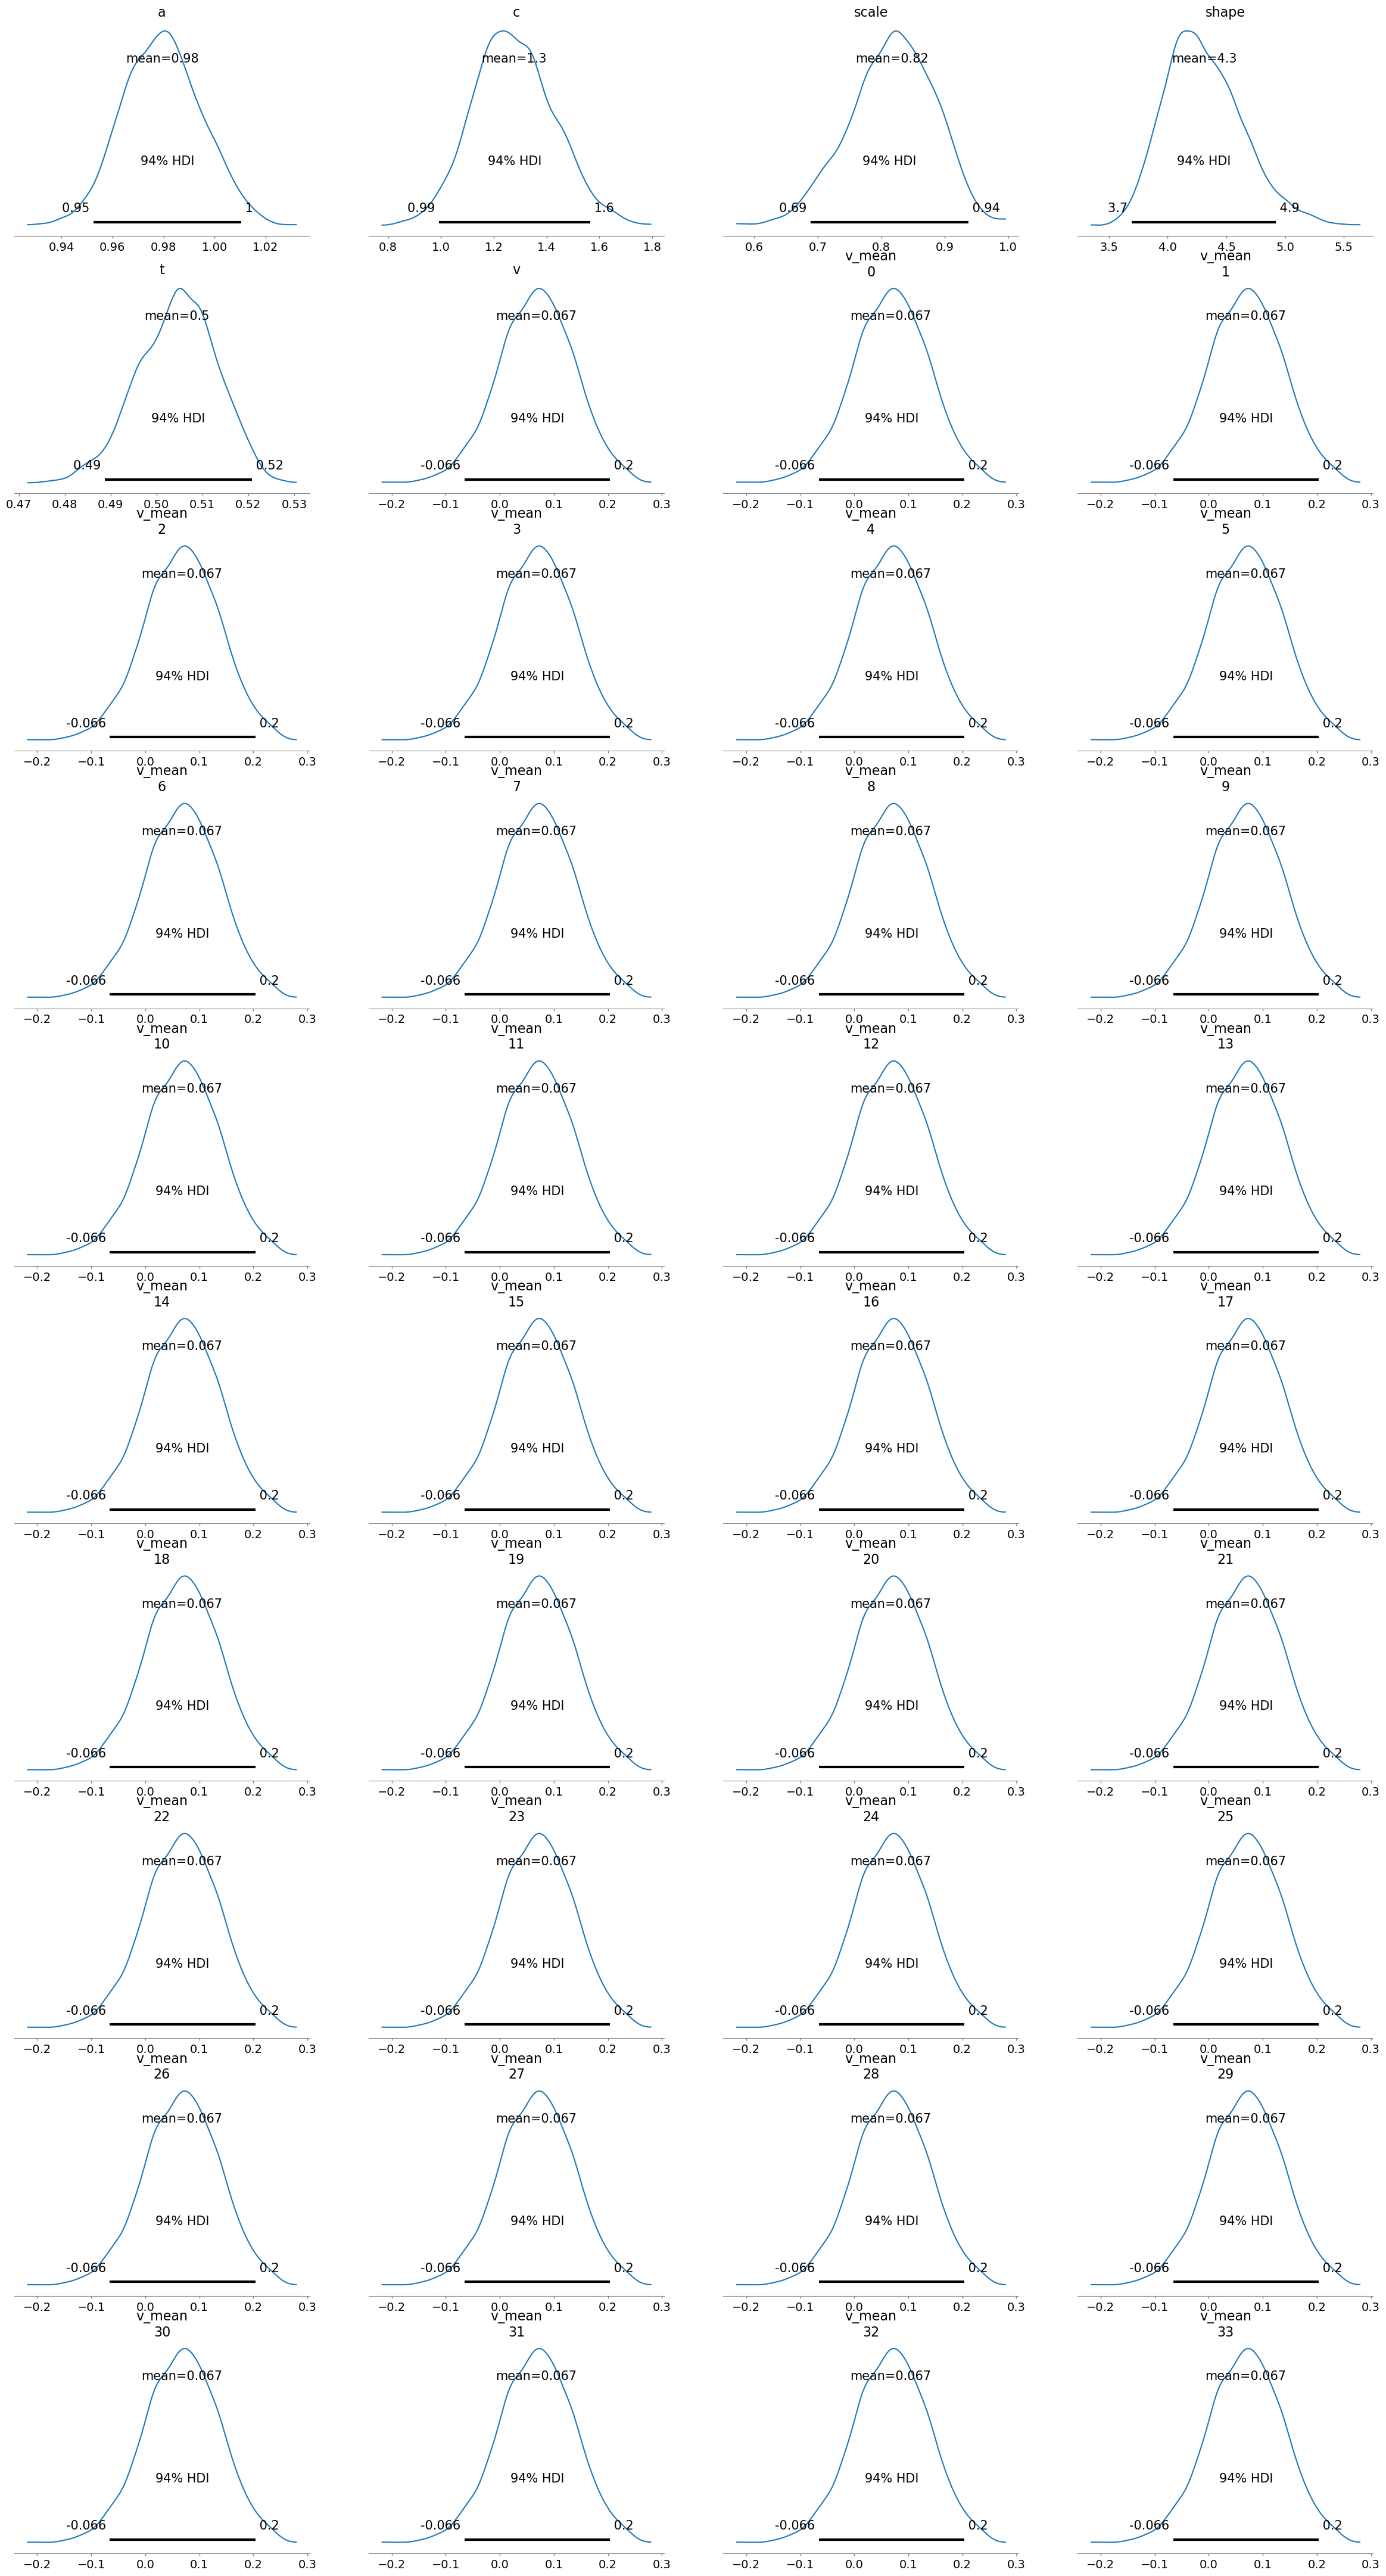

In [5]:
az.plot_posterior(gamma_model.traces)

c:\Users\super\miniforge3\envs\hssm_bambi\Lib\site-packages\arviz\plots\backends\matplotlib\pairplot.py:233: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


array([[<Axes: ylabel='c'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='scale'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='shape'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='t'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='v'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='v_mean\n0'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='v_mean\n1'>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='a', ylabel='v_mean\n2'>, <Axes: xlabel='c'>,
        <Axes: xlabel='scale'>, <Axes: xlabel='shape'>,
        <Axes: xlabel='t'>, <Axes: xlabel='v'>,
        <Axes: xlabel='v_mean\n0'>, <Axes: xlabel='v_me

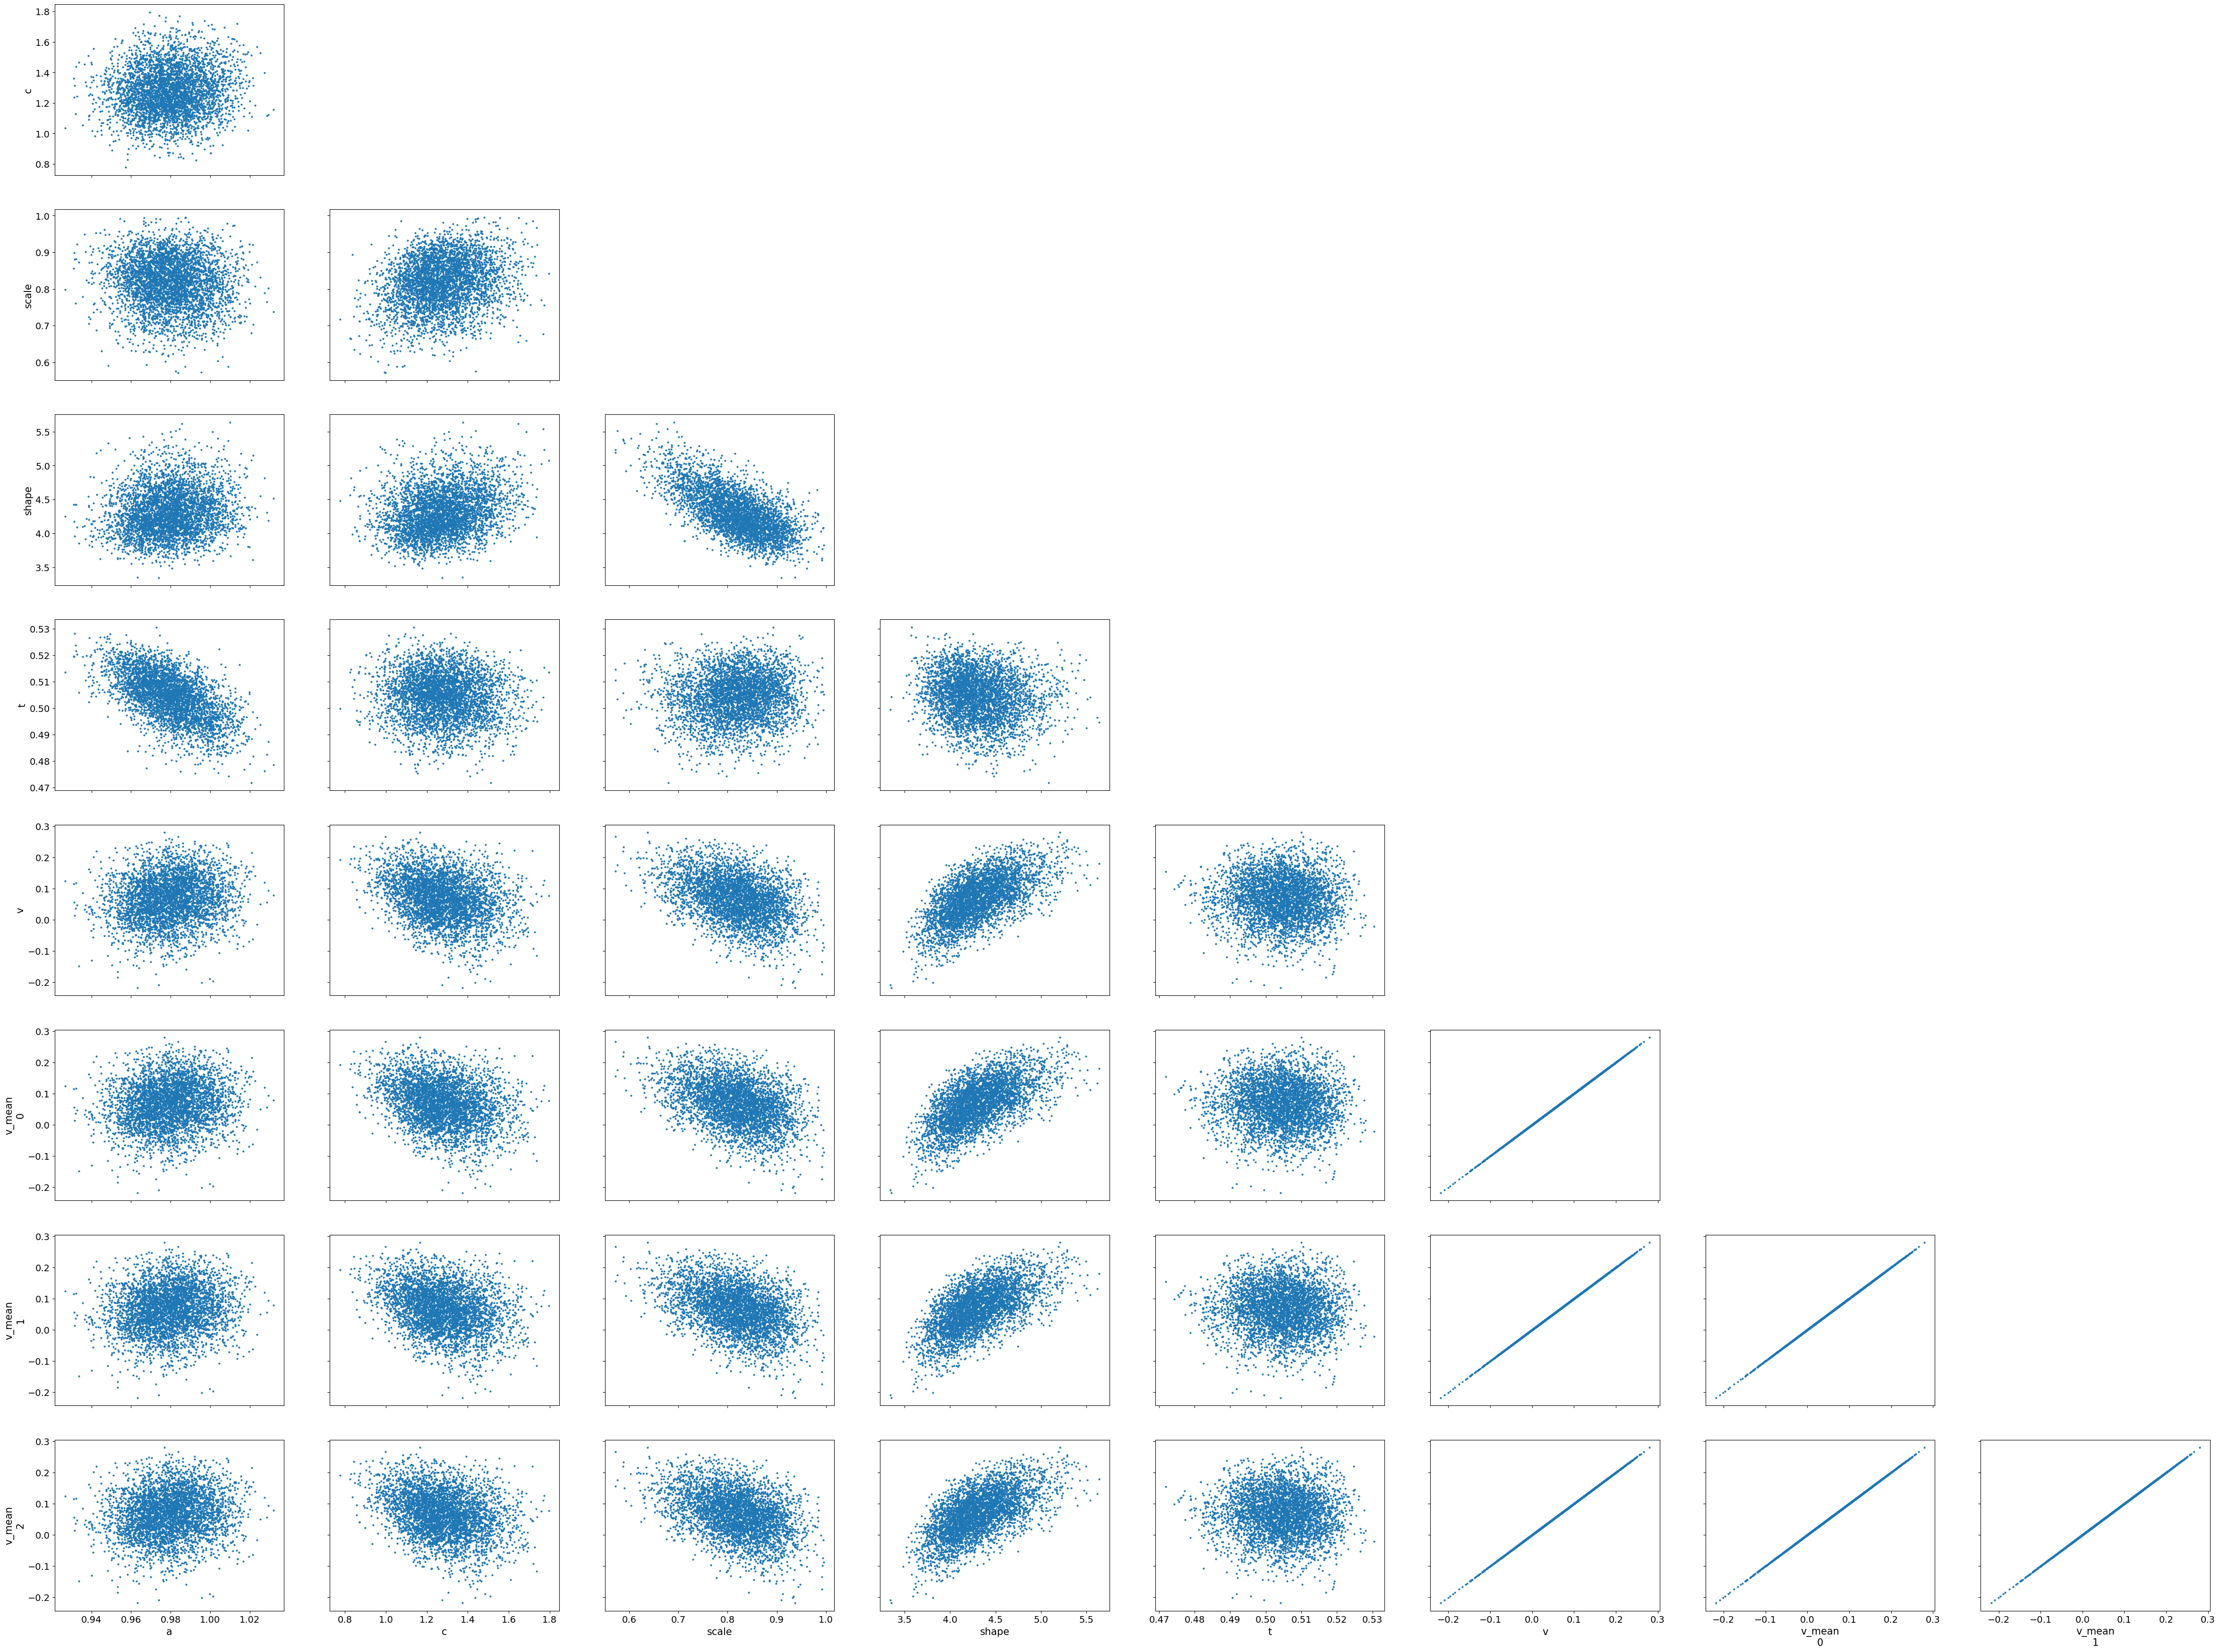

In [6]:
az.plot_pair(gamma_model.traces)